In [1]:
# Import Library and Setting Environment

In [2]:
import sklearn as sk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [3]:
# Exploratory Data Analysis
## 1. Read and extract data from data train and test sets
### 1.1 Loading data from csv

In [4]:
df_train = pd.read_csv("data_train.csv", delimiter=",")  # Train dataset
df_test  = pd.read_csv("data_test.csv",  delimiter=",")    # Test dataset

### 1.2 Insight of Raw Data 
Some necessary informations of Raw data sets: Dataframe Shape, Column Overview, Null Count and brief description of datasets.
#### 1.2.1. Data train

In [5]:
print(f"SHAPE OF DATAFRAME:\n{df_train.shape}\n")
print(f"DATA DUPLICATION:\nDuplicated entries: {df_train.duplicated().sum()}\n")
print(f"NULL VALUES COUNT:\n{df_train.isna().sum()}\n")
print(f"COLUMNS OVERVIEW:")
print(df_train.info())

SHAPE OF DATAFRAME:
(202944, 25)

DATA DUPLICATION:
Duplicated entries: 0

NULL VALUES COUNT:
Id                      0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
ExtraMedTest            0
ExtraAlcoholTest        0
Status                  0
dtype: int64

COLUMNS OVERVIEW:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202944 entries, 0 to 202943
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Id      

In [6]:
df_train.describe()

,Id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
count,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,...,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000
mean,101471.500000,0.428700,0.424344,0.962655,28.379824,0.442634,0.040844,0.094391,0.756302,0.635372,...,3.196971,4.256455,0.168707,0.439545,8.037449,5.050245,6.055641,-7.408660,-7.560041,0.175571
std,58585.030853,0.494891,0.494244,0.189607,6.612738,0.496700,0.197929,0.292372,0.429313,0.481327,...,7.427247,8.736665,0.374494,0.496333,3.051568,0.985601,2.070140,75.993743,75.927137,0.380455
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-199.000000,-199.000000,0.000000
25%,50735.750000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,-55.000000,-55.000000,0.000000
50%,101471.500000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,0.000000,0.000000,0.000000
75%,152207.250000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000,40.000000,40.000000,0.000000
max,202943.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,199.000000,199.000000,1.000000


In [7]:
df_train.head()

,Id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
0,0,0,0,1,24,1,0,0,1,0,...,0,0,0,0,8,4,5,60,0,0
1,1,0,0,1,28,0,0,0,1,1,...,1,0,0,0,2,6,8,0,-64,0
2,2,0,0,1,36,1,0,0,1,1,...,30,30,1,0,3,2,1,-46,0,0
3,3,0,1,1,35,0,0,0,1,1,...,0,0,0,0,8,6,8,-83,-188,0
4,4,0,1,1,27,0,0,0,1,0,...,0,0,0,0,9,5,4,-58,0,0


#### 1.2.2. Data Test
As the Data Test set is currently containing the column Status which is the target we need predict, removing the Status column in the Test dataset is needed to look up the data more precisely and does not left the column to be blank for now.

In [8]:
df_test = df_test.drop(columns=['Status'])
print(f"SHAPE OF DATAFRAME:\n{df_test.shape}\n")
print(f"DATA DUPLICATION:\nDuplicated entries: {df_test.duplicated().sum()}\n")
print(f"NULL VALUES COUNT:\n{df_test.isna().sum()}\n")
print(f"COLUMNS OVERVIEW:")
print(df_test.info())

SHAPE OF DATAFRAME:
(50736, 24)

DATA DUPLICATION:
Duplicated entries: 0

NULL VALUES COUNT:
Id                      0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
ExtraMedTest            0
ExtraAlcoholTest        0
dtype: int64

COLUMNS OVERVIEW:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50736 entries, 0 to 50735
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Id                    50736 non-null  i

In [9]:
df_test.describe()

,Id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest
count,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,...,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000
mean,228311.500000,0.430207,0.423230,0.962729,28.392522,0.445305,0.039479,0.093366,0.757509,0.629789,...,2.500867,3.135978,4.184583,0.166292,0.443531,8.010801,5.051187,6.046811,-10.972189,-11.429202
std,14646.365966,0.495110,0.494076,0.189428,6.592550,0.497004,0.194733,0.290947,0.428594,0.482866,...,1.060819,7.354835,8.642537,0.372346,0.496806,3.064743,0.986477,2.075180,74.323238,74.525657
min,202944.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-199.000000,-199.000000
25%,215627.750000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,-57.000000,-58.000000
50%,228311.500000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,0.000000,0.000000
75%,240995.250000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000,33.000000,32.000000
max,253679.000000,1.000000,1.000000,1.000000,95.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,199.000000,199.000000


In [10]:
df_test.head()

,Id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest
0,202944,1,1,1,30,1,0,1,1,1,...,2,3,0,0,1,11,4,7,0,-145
1,202945,0,0,1,27,1,0,0,0,0,...,1,0,30,1,1,13,2,5,28,-145
2,202946,0,0,1,21,0,0,0,1,1,...,3,0,5,0,0,10,6,8,-26,72
3,202947,0,0,1,24,1,0,0,1,1,...,4,0,30,0,0,9,6,7,0,0
4,202948,1,0,1,34,0,0,0,1,1,...,4,0,1,1,0,11,4,7,-73,-63


### 1.3. Overview of the dataframe

At the first glance, we can see that there are 25 columns in this datasets representing data of patient:

| Feature               | Data Type | Description                                                                                                     |
|-----------------------|-----------|-----------------------------------------------------------------------------------------------------------------|
| ID                    | int64     | Patient ID                                                                                                      |
| Status                | int64     | 0 = no diabetes 1 = prediabetes or diabetes                                                                     |
| HighBP                | int64     | 0 = no high BP 1 = high BP                                                                                      |
| HighChol              | int64     | 0 = no high cholesterol 1 = high cholesterol                                                                    |
| CholCheck             | int64     | 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years                                        |
| BMI                   | int64     | Body Mass Index                                                                                                 |
| Smoker                | int64     | Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes   |
| Stroke                | int64     | (Ever told) you had a stroke. 0 = no 1 = yes                                                                   |
| HeartDiseaseorAttack | int64     | coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes                                      |
| PhysActivity          | int64     | physical activity in past 30 days - not including job 0 = no 1 = yes                                            |
| Fruits                | int64     | Consume Fruit 1 or more times per day 0 = no 1 = yes                                                           |
| Veggies               | int64     | Consume Vegetables 1 or more times per day 0 = no 1 = yes                                                      |
| HvyAlcoholConsump     | int64     | Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no 1 = yes |
| AnyHealthcare         | int64     | Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes |
| NoDocbcCost           | int64     | Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes |
| GenHlth               | int64     | Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor |
| MentHlth              | int64     | Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days |
| PhysHlth              | int64     | Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days |
| DiffWalk              | int64     | Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes                                      |
| Sex                   | int64     | 0 = female 1 = male                                                                                             |
| Age                   | int64     | 13-level a.ge categor.y: 1 = 18-24 9 = 60-64 13 = 80 or older                                                     |
| Education             | int64     | Education level: scale 1-6 1 = Never attended school or only kindergarten 2 = Grades 1 through 8 (Elementary) 3 = Grades 9 through 11 (Some high school) 4 = Grade 12 or GED (High school graduate) 5 = College 1 year to 3 years (Some college or technical school) 6 = College 4 years or more (College graduate) |
| Income                | int64     | 0 or more                        |
| ExtraMedTest          | int64     | The result of an extra medical test, range (-100, 100)                                                          |
| ExtraAlcoholTest      | int64     | The result of an extra alcohol test, range (-100, 100)                                                          |


Apparently, the column ID does not affect the possibilty of patient having diabets. Therefore, we drop the columns ID in two data train and test:

In [11]:
df_train = df_train.drop(columns=['Id'])
df_test = df_test.drop(columns=['Id'])

Containing Missing Data in column: From brief insight, there are no null data or missing data in both data train and test.

In [12]:
print(f"Null values count: {df_test.isna().sum().sum() + df_train.isna().sum().sum()}")

Null values count: 0


From the table of column above, there are clearly to observe that there are two kinds of column in the dataset.  
+) The continuous values column: ID, BMI, EXTRA_MED_TEST, EXTRA_ALCOHOL_TEST.  
+) The classification column: The remaining features.  

#Further insights: There might need some rescaling data for the continuous value columns if the range is heavily different from the binary range (0-1) in order to improve convergence speed and prevent certain features from dominating others during training.

In [13]:
# Initialize lists to store column names
classification_cols = []
continuous_cols = []

# Loop through each column
for col in df_train.columns:
    # Check if the column has less than 30 unique values( the max scale is 30)
    if df_train[col].nunique() <= 30:
        classification_cols.append(col)
    # Check if the column has more than 30 unique values (continuous)
    elif df_train[col].nunique() > 35:
        continuous_cols.append(col)

# Print identified binary and continuous columns
print("Classification Columns:", classification_cols)
print("Continuous Columns:", continuous_cols)

Classification Columns: ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'Status']
Continuous Columns: ['BMI', 'ExtraMedTest', 'ExtraAlcoholTest']


Conclusion: The column we need to predict the new data is Status which is a binary values column represent for the probabilty of patient having diabets by using 23 features above excluding ID columns. The target will be labeled as 0 and 1 values which is for having no diabets and pre-diabets or having diabets respectively.

### 2. Data Train Distribution
#### 2.1 Visualization by Histogram

Using histogram where x-axis is 

<Figure size 640x480 with 0 Axes>

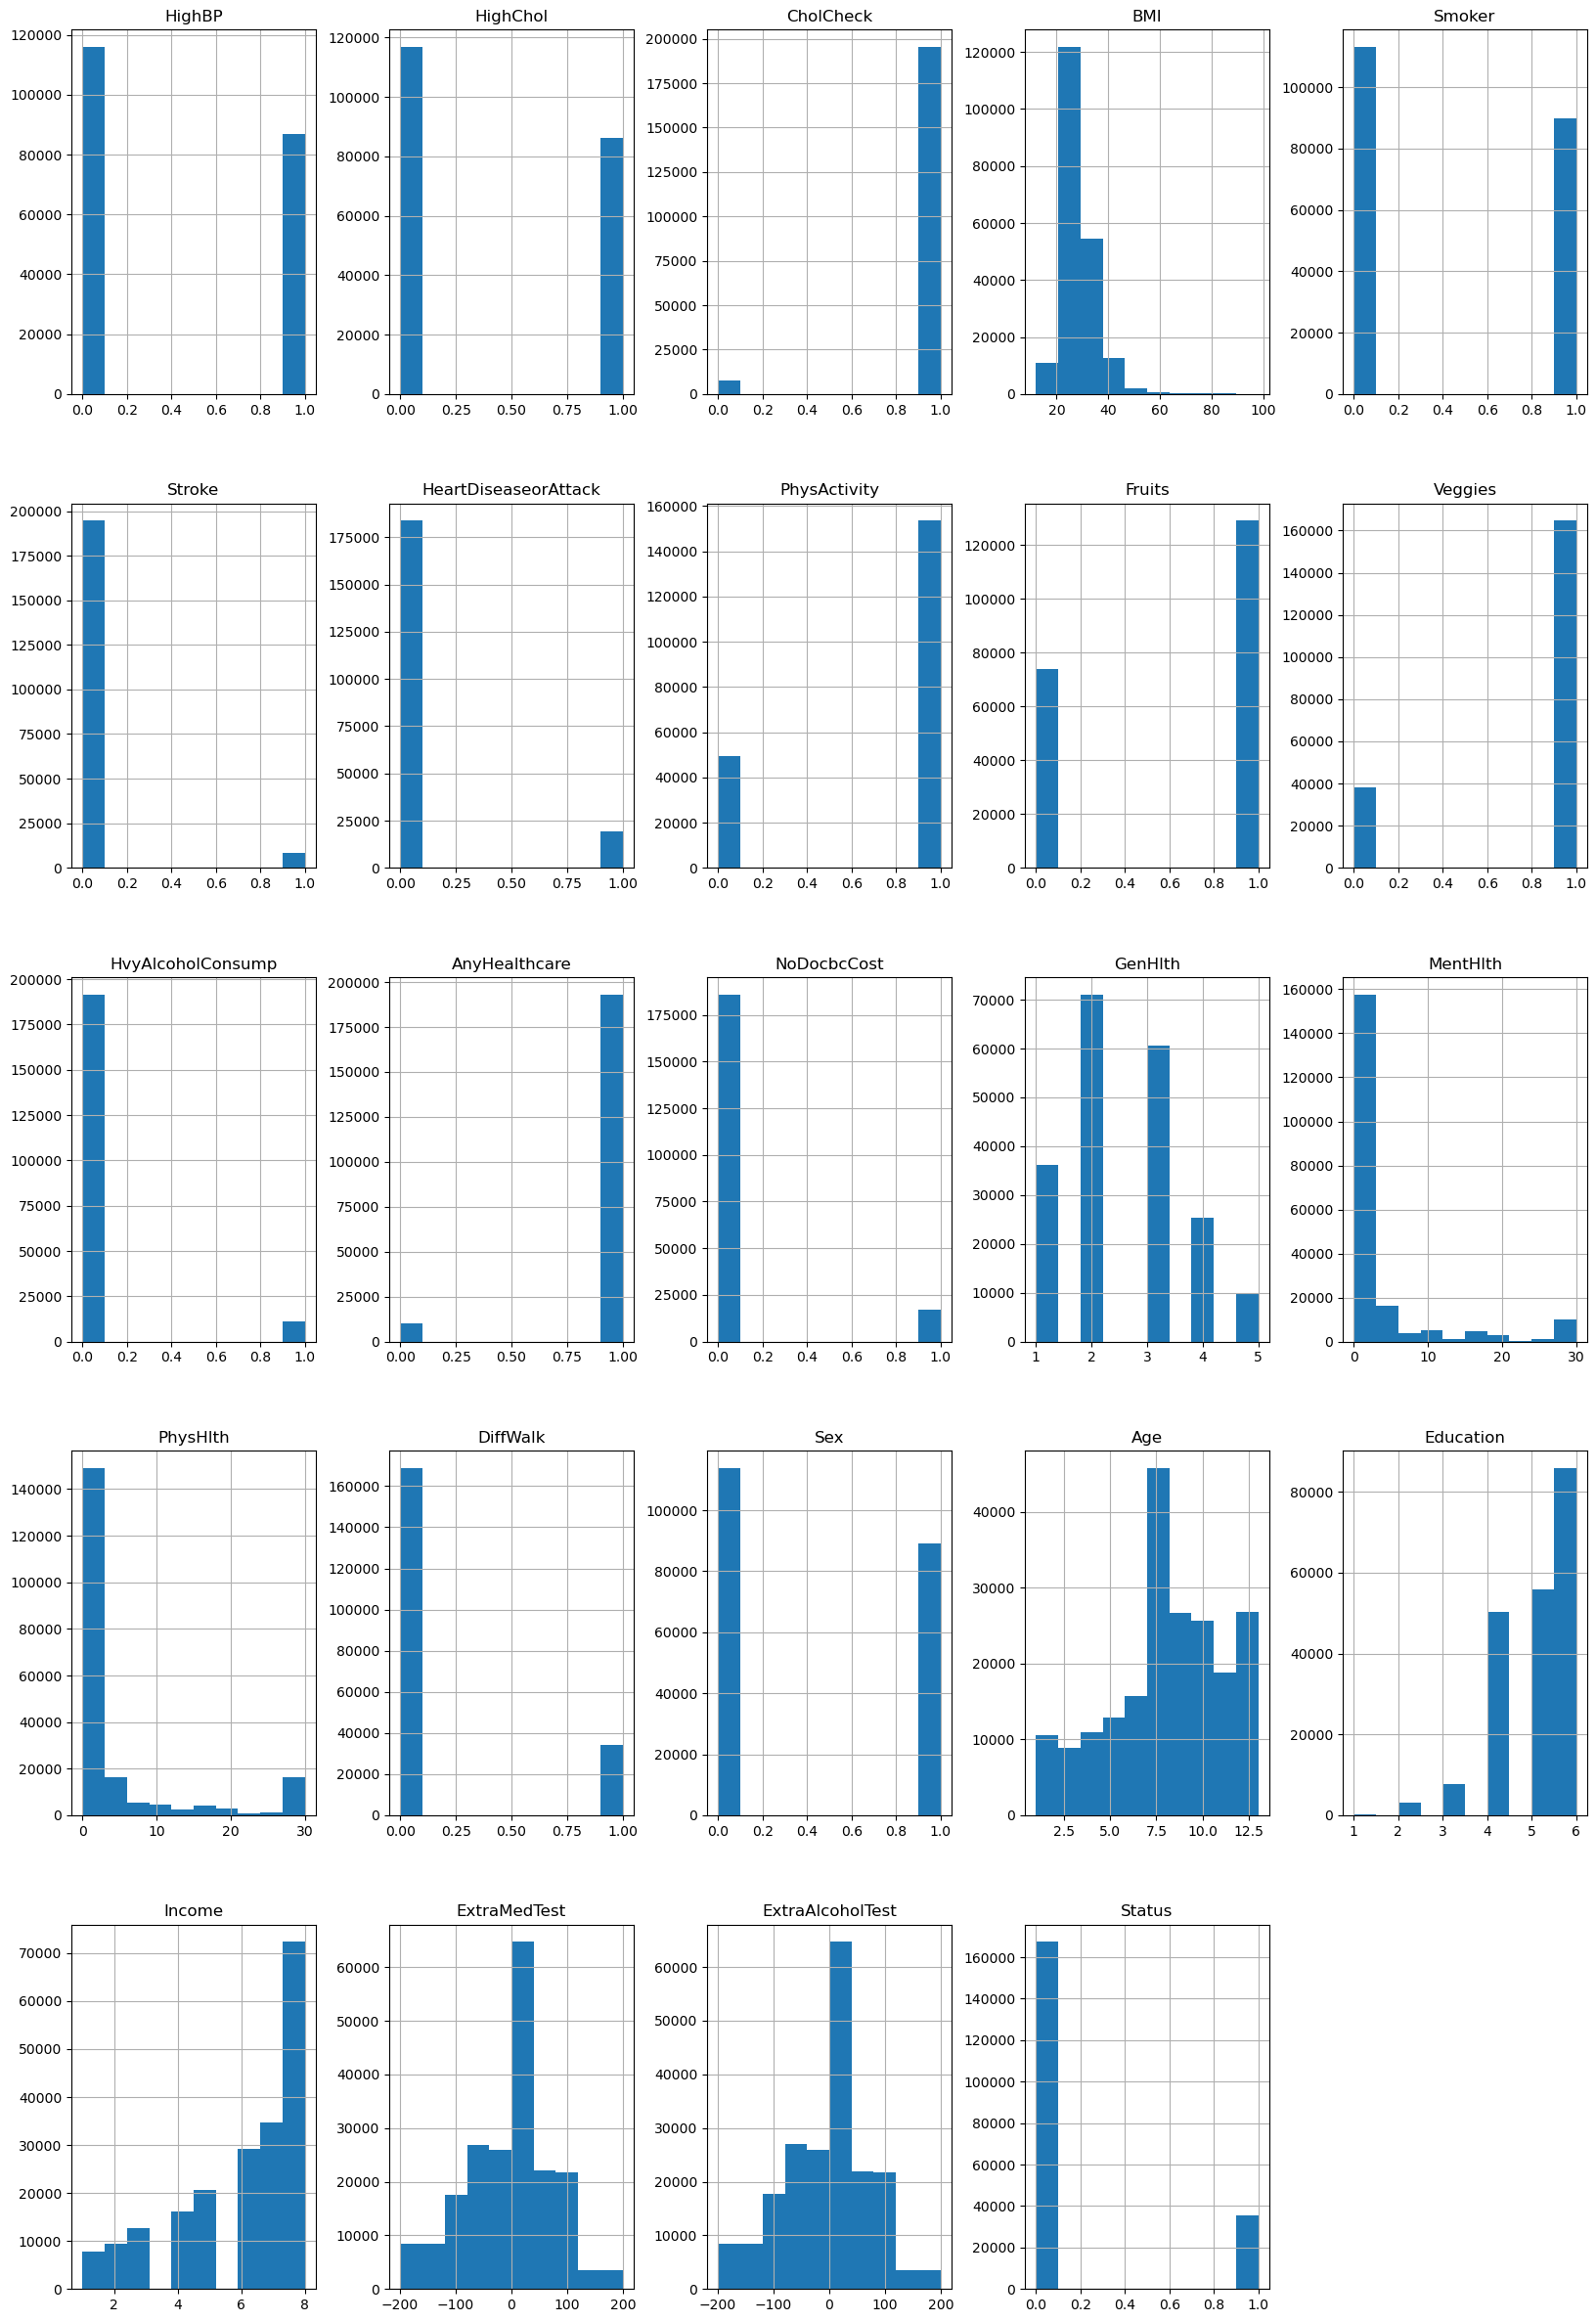

In [14]:
plt.figure()
df_train.hist(figsize=(20,30))
plt.savefig("./Image/HistogramDistribution.png", dpi=300)  # Save the plot with DPI 300
plt.show()

#### 2.2 Boxplot

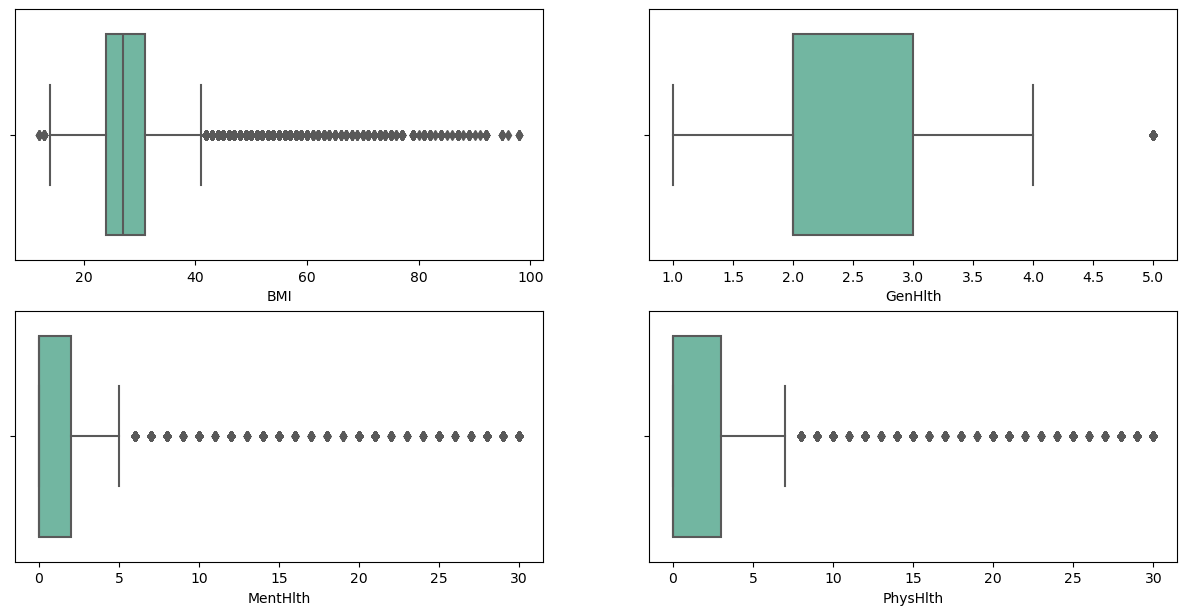

In [15]:
plt.figure(figsize = (15,15))
for i,col in enumerate(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = df_train ,palette='Set2')
plt.savefig("./Image/BoxPlot.png", dpi=300)  # Save the plot with DPI 300
plt.show()

#### 2.3 Feature Correlation

In [16]:
correlation_matrix = df_train.corr()

# Extracting the last column using iloc (integer-location based indexing)
last_column = correlation_matrix.iloc[:, -1]

# Displaying the last column
print(last_column)

HighBP                  0.216561
HighChol                0.166249
CholCheck               0.052846
BMI                     0.178972
Smoker                  0.051720
Stroke                  0.086420
HeartDiseaseorAttack    0.145864
PhysActivity           -0.097015
Fruits                 -0.032827
Veggies                -0.045344
HvyAlcoholConsump      -0.046800
AnyHealthcare           0.012459
NoDocbcCost             0.028245
GenHlth                 0.242096
MentHlth                0.057557
PhysHlth                0.140679
DiffWalk                0.181007
Sex                     0.024257
Age                     0.146599
Education              -0.106457
Income                 -0.139126
ExtraMedTest            0.499234
ExtraAlcoholTest        0.498742
Status                  1.000000
Name: Status, dtype: float64


Text(0.5, 1.0, 'correlation of feature')

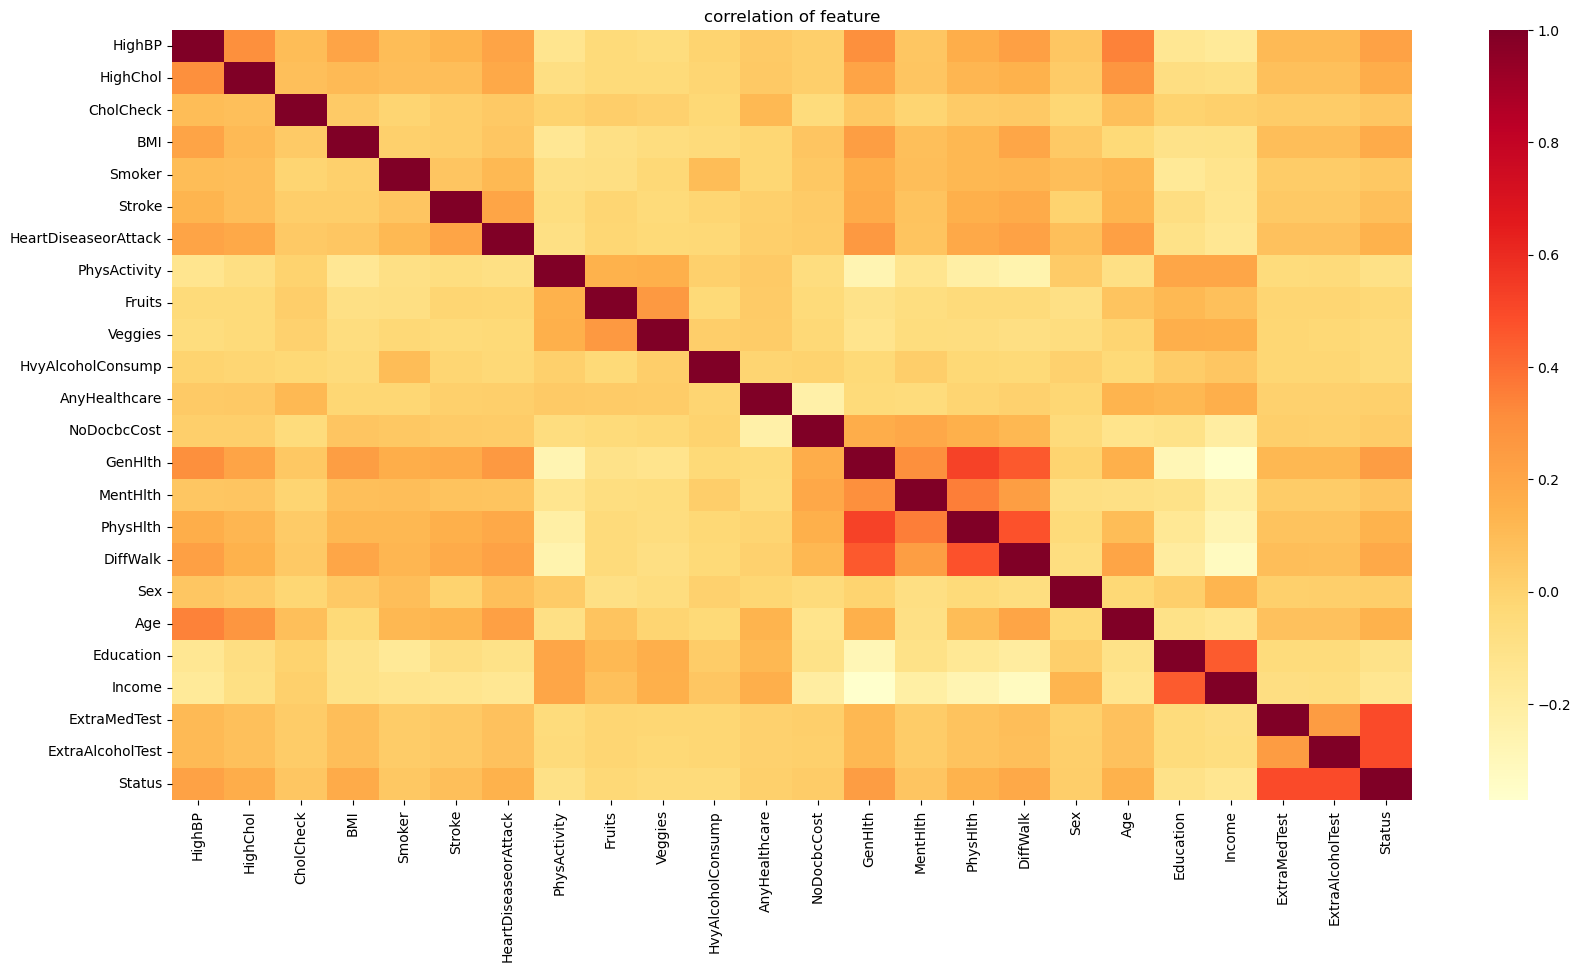

In [17]:
plt.figure(figsize = (20,10))
sns.heatmap(df_train.corr(), cmap ='YlOrRd' )
plt.title("correlation of feature")

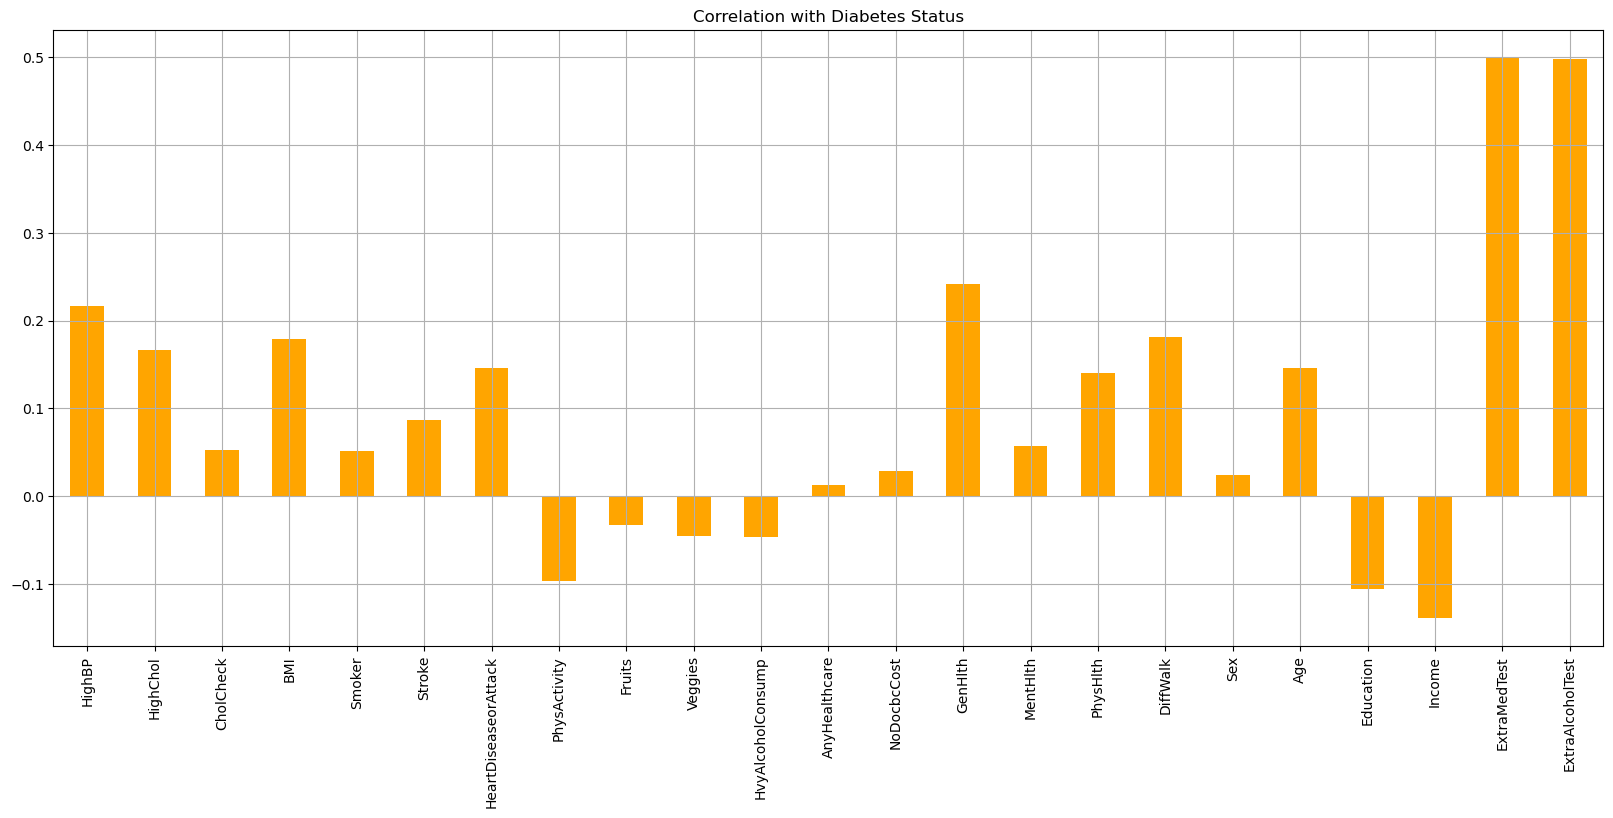

In [18]:
corr = df_train.drop('Status', axis=1).corrwith(df_train['Status'])

# Plot the correlations
plt.figure(figsize=(20, 8))
corr.plot(kind='bar', grid=True, title="Correlation with Diabetes Status", color="Orange")
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.tight_layout()

# Save the plot as an image
plt.savefig("./Image/correlation_plot.png")
plt.show()

In [19]:
cols = ['HighBP', 'HighChol', 'CholCheck','Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']

def create_plot_pivot(data2, x_column):
    """ Create a pivot table for satisfaction versus another rating for easy plotting. """
    _df_plot = data2.groupby([x_column, 'Status']).size().reset_index().pivot(columns='Status', index=x_column, values=0)
    return _df_plot

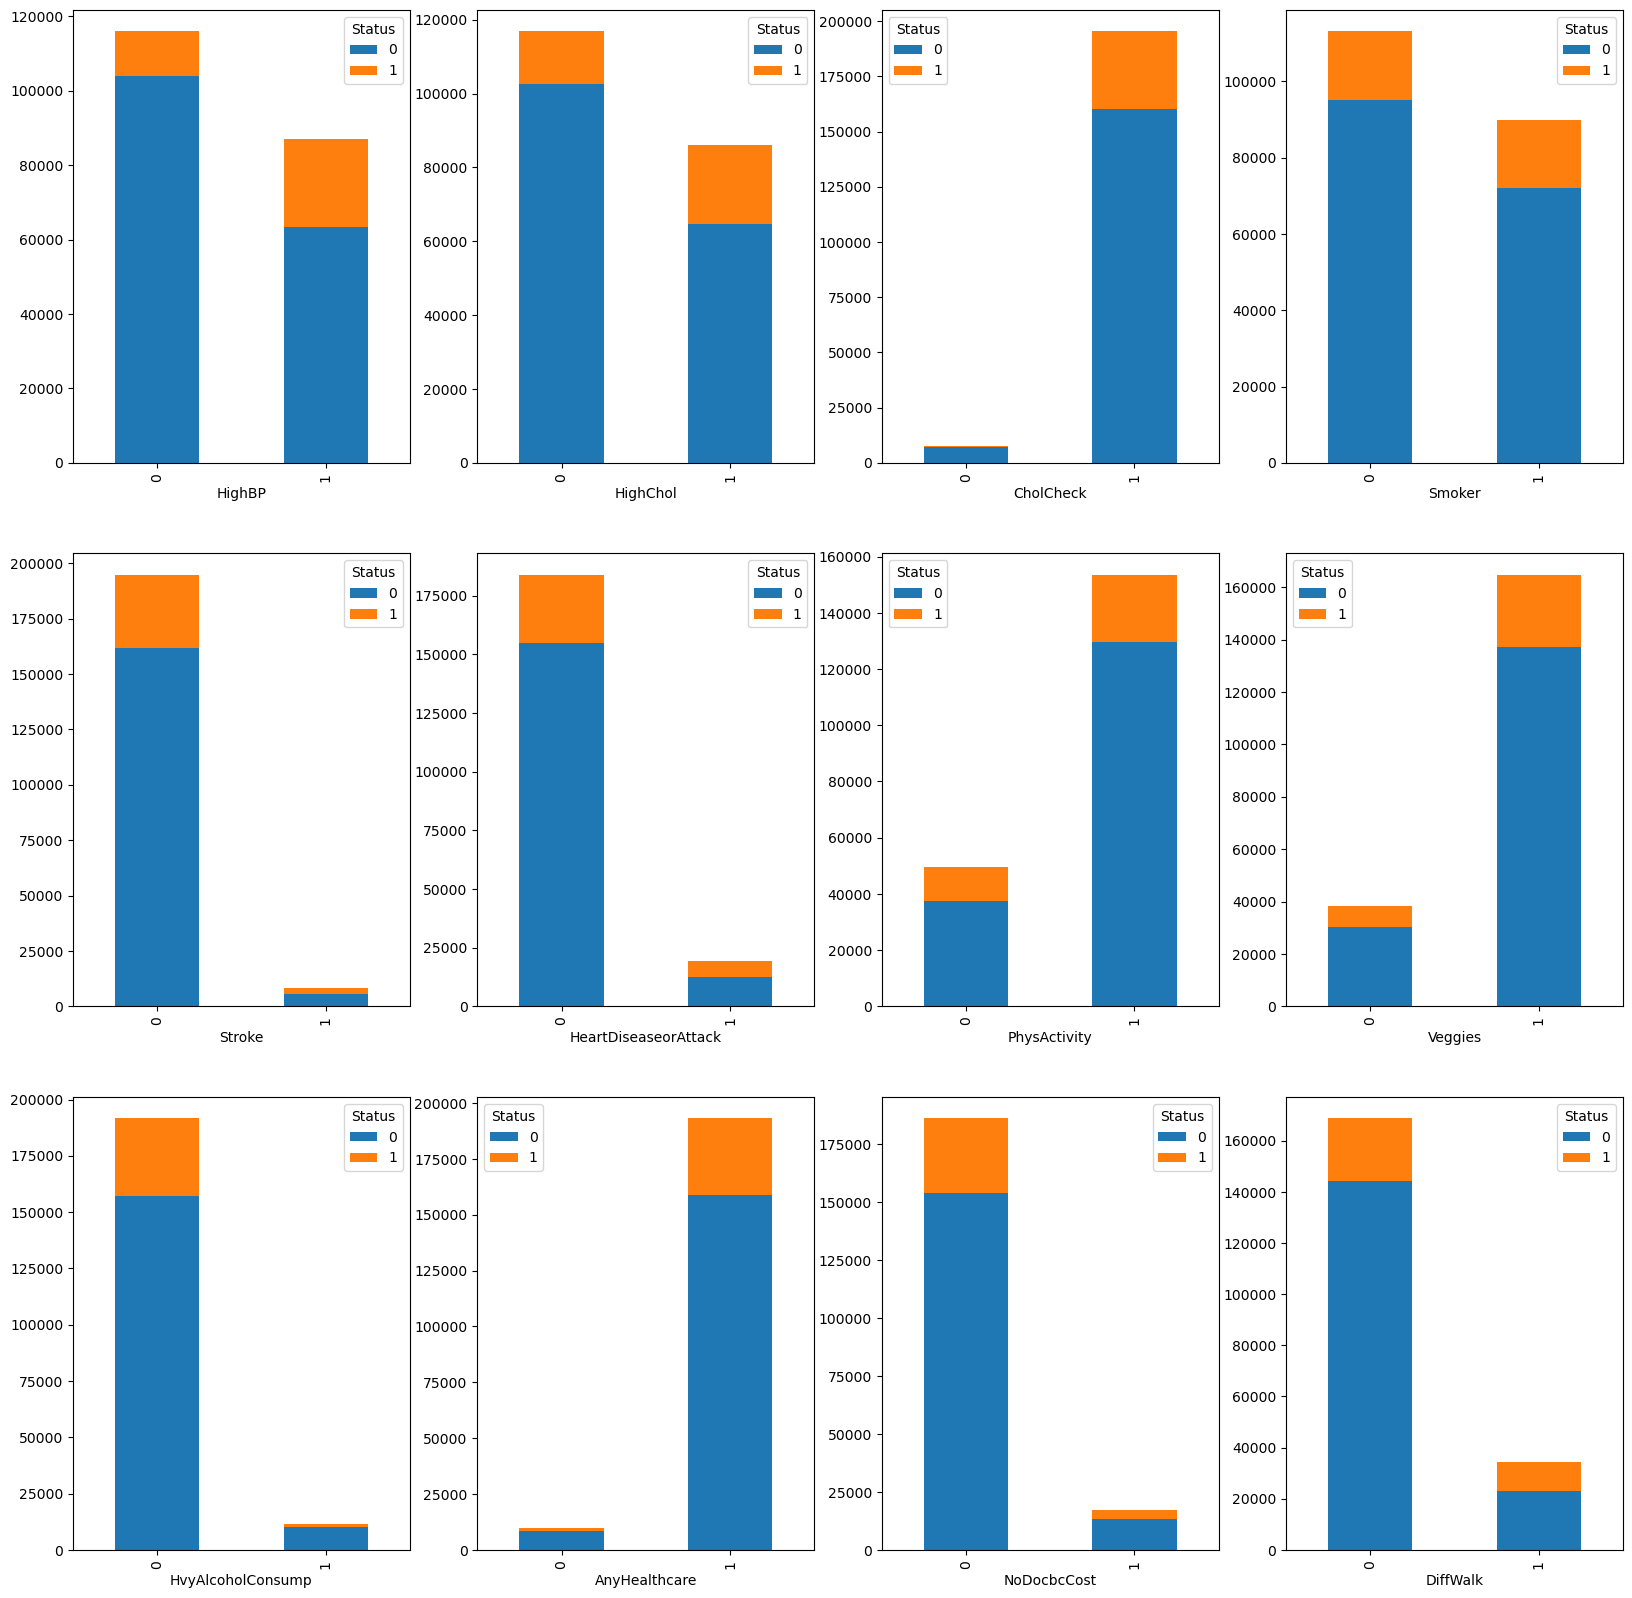

In [20]:
fig, ax = plt.subplots(3, 4, figsize=(20,20))
axe = ax.ravel()

c = len(cols)

for i in range(c):
    create_plot_pivot(df_train, cols[i]).plot(kind='bar',stacked=True, ax=axe[i])
    axe[i].set_xlabel(cols[i])